# Lending Club Default Analysis
The analysis is divided into four main parts:

1.Data understanding
2.Data cleaning (cleaning missing values, removing redundant columns etc.)
3.Data Analysis
4.Driving factors behind loan default


In [1]:
import pandas as pd,seaborn as sns,matplotlib as plt, numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
df=pd.read_csv("loan.csv",sep=',')

# 1.Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [36]:
# let's look at the first few rows of the df
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


The target variable, which we want to compare across the independent variables, is loan status. The strategy is to figure out compare the average default rates across various independent variables and identify the ones that affect default rate the most.

In [21]:
print(df.shape)

(39717, 111)


# 2.Data Cleaning

# Remove columns having missing values for 75% of records

Creating function to drop columns with missing values based on percentage

In [83]:

def drop_columns_with_missing_values(df, threshold=.75):
    total_rows = len(df)
    missing_threshold = threshold * total_rows

    # Calculate the number of missing values in each column
    missing_counts = df.isnull().sum()

    # Get the column names where the number of missing values is greater than the threshold
    columns_to_drop = missing_counts[missing_counts > missing_threshold].index.tolist()

    # Drop the columns from the DataFrame
    df_dropped = df.drop(columns=columns_to_drop)

    return df_dropped,columns_to_drop

In [84]:
    df_cleaned,dropped_columns = drop_columns_with_missing_values(df, threshold=.75)

In [8]:
print(dropped_columns)

['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort'

In [9]:
print(df_cleaned.shape)

(39717, 55)


Reduced columns from 111 to 55 columns

In [320]:
# summarise percentage of missing values
100*(df_cleaned.isnull().sum()/len(df_cleaned.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


mths_since_last_delinq has 64% missing values, so we can plan to remove it. 
Secondly, months since last delinquent represents the number months passed since the person last fell into the 90 DPD group. There is an important reason we shouldn't use this column in analysis - since at the time of loan application, we will not have this data (it gets generated months after the loan has been approved), it cannot be used as a predictor of default at the time of loan approval.


In [85]:
df_cleaned,dropped_columns = drop_columns_with_missing_values(df_cleaned, threshold=.60)

In [9]:
print(dropped_columns)

['mths_since_last_delinq']


We can remove URL column as it is not needed for analysis
We can remove desc column as well. Column description contains the comments the applicant had written while applying for the loan. Although one can use some text analysis techniques to derive new features from this column (such as sentiment, number of positive/negative words etc.), we will not use this column in this analysis.

In [86]:
df_cleaned = df_cleaned.drop(columns=['url', 'desc'])

In [87]:
#Removing column as majority of data has 0 as value
df_cleaned = df_cleaned.drop(columns=['pub_rec_bankruptcies'])

In [12]:
df_cleaned.shape

(39717, 51)

In [41]:
df_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


 We have already removed colums with missing values. Now we can check whether some rows have more than 5 missing values

In [13]:
len(df_cleaned[df_cleaned.isnull().sum(axis=1) > 5].index)
#There are no rows which has move than 5 missing values

0

# Remove columns with constant/default values

In [88]:
#All records of these columns has same value
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print(constant_columns)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [89]:
df_cleaned=df_cleaned.drop(columns=constant_columns)

We can remove id columns as it is not meaningful in analysis

In [90]:
df_cleaned=df_cleaned.drop(columns=['id','member_id'])

In [16]:
df_cleaned.shape

(39717, 40)

# 3.Data Analysis & Readiness
Let's now move to data analysis. To start with, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis.

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables - 1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 2. loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

Thus, going forward, we will use only the other two types of variables.

In [327]:
df_cleaned.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [91]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d']

In [92]:
# let's now remove the behaviour variables from analysis
df_cleaned = df_cleaned.drop(behaviour_var, axis=1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            37258 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  purpose              39717 non-null 

In [93]:
# also, we will not be able to use the variables zip code, address. etc. But for timebeing we will keep state 
# the variable 'title' is derived from the variable 'purpose'
# thus let get rid of all these variables as well
#we can drop 'emp_title' also

df_cleaned = df_cleaned.drop(['title', 'zip_code','emp_title'], axis=1)

df_cleaned.shape

(39717, 17)

In [48]:
df_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


In [20]:
df_cleaned['term'].value_counts()

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

In [335]:
#df_cleaned['term']=df_cleaned['term'].apply(lambda x: pd.to_numeric(x.split("months")[0]))

In [21]:
df_cleaned['int_rate'].value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [94]:
df_cleaned['int_rate']=df_cleaned['int_rate'].str.replace('%','')
df_cleaned['int_rate']=pd.to_numeric(df_cleaned['int_rate'])
df_cleaned['int_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


In [95]:
# also, lets extract the numeric part from the variable employment length

# first, let's drop the missing values from the column (otherwise the regex code below throws error)
df_cleaned = df_cleaned[~df_cleaned['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
df_cleaned['emp_length'] = df_cleaned['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
df_cleaned['emp_length'] = df_cleaned['emp_length'].apply(lambda x: pd.to_numeric(x))

# 3.1 Univariate Analysis 
Next, let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [96]:
df_cleaned['loan_status'] = df_cleaned['loan_status']
df_cleaned['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

You can see that fully paid comprises most of the loans. The ones marked 'current' are neither fully paid not defaulted, so let's get rid of the current loans. Also, let's tag the other two values as 0 or 1.

In [97]:
# filtering only fully paid or charged-off
df_cleaned = df_cleaned[df_cleaned['loan_status'] != 'Current']
df_cleaned['loan_status_numeric'] = df_cleaned['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df_cleaned['loan_status_numeric'] = df_cleaned['loan_status_numeric'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df_cleaned['loan_status_numeric'].value_counts()

loan_status_numeric
0    32145
1     5399
Name: count, dtype: int64

In [24]:
df_cleaned['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Name: count, dtype: int64

Text(0, 0.5, 'Count')

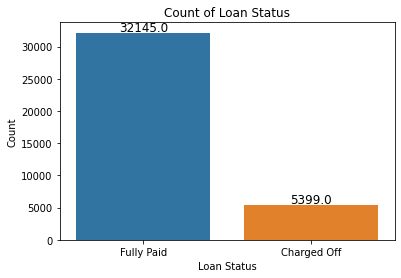

In [98]:
ax=sns.countplot(data=df_cleaned, x='loan_status')

# Add exact values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Count of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")


In the plot we can see that defaulter's count is around 5000

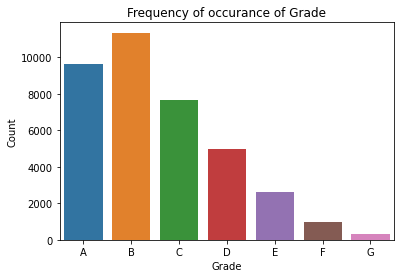

In [32]:
# Trying to do univariate anallysis on another categorical variable
df_cleaned['grade'] = df_cleaned['grade'].astype('category')
sns.countplot(data=df_cleaned, x='grade')

plt.title("Frequency of occurance of Grade")
plt.xlabel("Grade")
plt.ylabel("Count")

plt.show()

Out of fully paid/Defaulted customers, more loans has been provided for Grade B

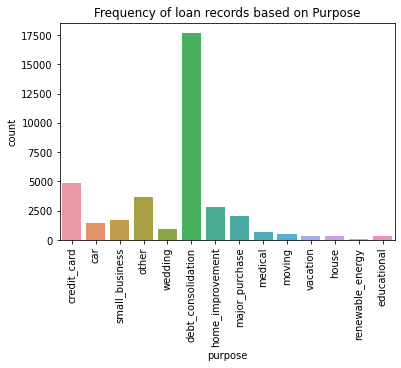

In [33]:
# Trying to do univariate anallysis on another categorical variable

df_cleaned['grade'] = df_cleaned['purpose'].astype('category')
plt.title("Frequency of loan records based on Purpose")
sns.countplot(data=df_cleaned, x='purpose')
plt.xticks(rotation=90)
plt.show()

Top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In the count plot, you are simply observing the frequency of each purpose category. 
The highest bar for debt consolidation and credit card indicates that these are thae most common purposes among the loans in your dataset. It doesn't directly reflect the default rate.

In [99]:
continuous_columns = df_cleaned.select_dtypes(include=["float64","int64"]).columns
print(continuous_columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti',
       'loan_status_numeric'],
      dtype='object')


Text(0.5, 1.0, 'Loan Amount Distribution')

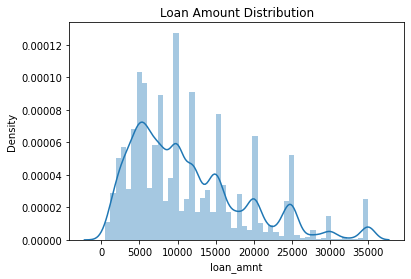

In [24]:
sns.distplot(df_cleaned['loan_amnt'])
plt.title("Loan Amount Distribution")

Text(0.5, 1.0, 'Loan Amount Distribution')

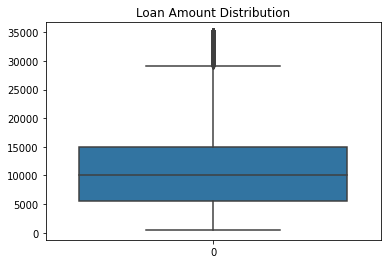

In [26]:
sns.boxplot(df_cleaned['loan_amnt'])
plt.title("Loan Amount Distribution")

Text(0.5, 1.0, 'Interest Rate Distribution')

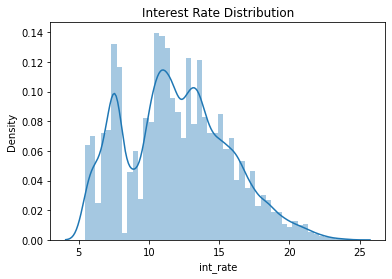

In [34]:
sns.distplot(df_cleaned['int_rate'])
plt.title("Interest Rate Distribution")


Majority of loans are between range 5000-15000. There is a pattern observed in amount which can be segmented for further analysis

Text(0.5, 1.0, 'Interest Rate Distribution')

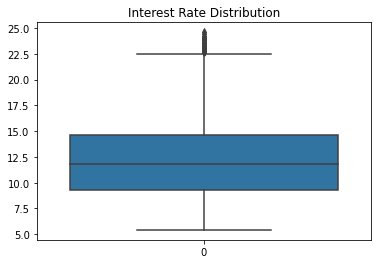

In [30]:
sns.boxplot(df_cleaned['int_rate'])
plt.title("Interest Rate Distribution")

Observation : Maximum of people have loans with interest rate >8 and less than 15. Possibility of  2 segments of loans with interest rate 


Text(0.5, 1.0, 'Income Distribution')

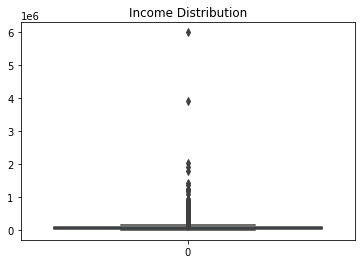

In [31]:
sns.boxplot(df_cleaned['annual_inc'])
plt.title("Income Distribution")

Text(0.5, 1.0, 'Income Distribution')

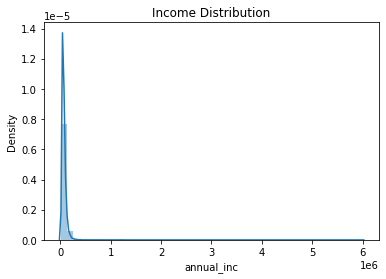

In [32]:
sns.distplot(df_cleaned['annual_inc'])
plt.title("Income Distribution")

Observation : Annual Income is right skewed and it has outliers


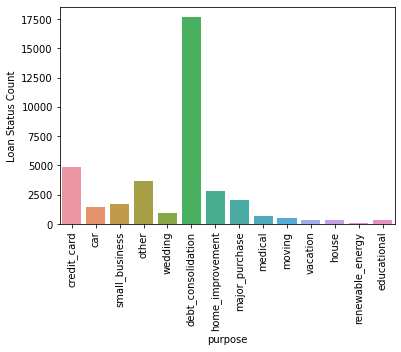

In [266]:
#df_cleaned['grade'] = df_cleaned['grade'].astype('category')
sns.countplot(data=df_cleaned, x='purpose')
plt.ylabel("Loan Status Count")
#plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.show()

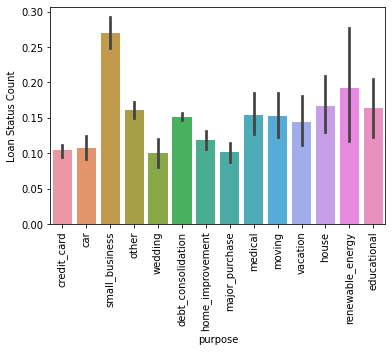

In [268]:
sns.barplot(data=df_cleaned, x='purpose',y='loan_status_numeric')
plt.ylabel("Loan Status Count")
#plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.show()

# 3.2 Bivariate Analysis

Creating function to plot graphs bsed on target variable- loan status

In [107]:
#lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status_numeric', data=df_cleaned)
    plt.show()
    

# # Bivariate Analysis on Categorical variables

In [101]:
categorical_columns = df_cleaned.select_dtypes(include=["object"]).columns
print(categorical_columns)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state'],
      dtype='object')


<Figure size 2160x720 with 0 Axes>

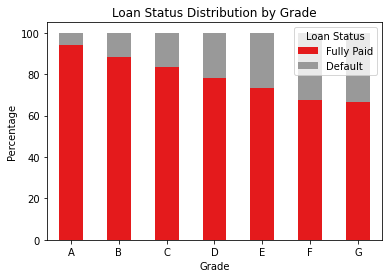

In [63]:
percentage_df = df_cleaned.groupby(["grade"])["loan_status_numeric"].value_counts(normalize=True).unstack() * 100
plt.figure(figsize=(30, 10))
percentage_df.plot(kind="bar", stacked=True,colormap="Set1")
plt.title("Loan Status Distribution by Grade")
plt.xlabel("Grade")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Loan Status", labels=["Fully Paid", "Default"])

plt.show()

Conclusion: Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan.

In [102]:
from datetime import datetime
df_cleaned['issue_d'] = df_cleaned['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [103]:
# extracting month and year from issue_date
df_cleaned['month'] = df_cleaned['issue_d'].apply(lambda x: x.month)
df_cleaned['year'] = df_cleaned['issue_d'].apply(lambda x: x.year)

In [104]:
categorical_columns = df_cleaned.select_dtypes(include=["object"]).columns
print(categorical_columns)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'addr_state'],
      dtype='object')


<Figure size 2160x720 with 0 Axes>

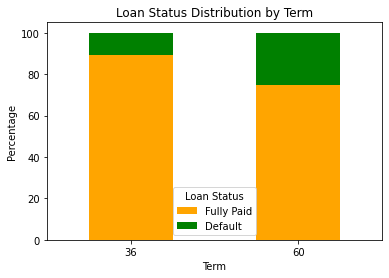

In [465]:
percentage_df = df_cleaned.groupby("term")["loan_status_numeric"].value_counts(normalize=True).unstack() * 100
plt.figure(figsize=(30, 10))
ax=percentage_df.plot(kind="bar", stacked=True)
custom_palette = ["orange", "green"]
plt.title("Loan Status Distribution by Term")
plt.xlabel("Term")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Loan Status", labels=["Fully Paid", "Default"])

plt.show()

Conclusion based on term column: 60 months loans default more than 36 months loans

<Figure size 2160x720 with 0 Axes>

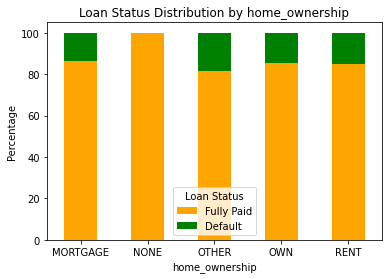

In [464]:
percentage_df = df_cleaned.groupby("home_ownership")["loan_status_numeric"].value_counts(normalize=True).unstack() * 100
plt.figure(figsize=(30, 10))
ax=percentage_df.plot(kind="bar", stacked=True)
custom_palette = ["orange", "green"]
plt.title("Loan Status Distribution by home_ownership")
plt.xlabel("home_ownership")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Loan Status", labels=["Fully Paid", "Default"])

plt.show()

Conclusion based on homeownersip column: Irrespective of whether someone have owned home or not, there is no variation on defaulter rate


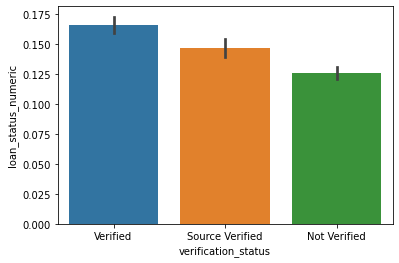

In [108]:
# verification_status: surprisingly, verified loans default more than not verifiedb
plot_cat('verification_status')

<Figure size 2160x720 with 0 Axes>

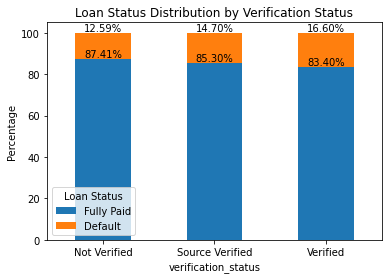

In [105]:
percentage_df = df_cleaned.groupby("verification_status")["loan_status_numeric"].value_counts(normalize=True).unstack() * 100
plt.figure(figsize=(30, 10))
ax=percentage_df.plot(kind="bar", stacked=True)
custom_palette = ["orange", "green"]
plt.title("Loan Status Distribution by Verification Status")
plt.xlabel("verification_status")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Loan Status", labels=["Fully Paid", "Default"])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

Conclusion: There is no much significant difference in defaulter rate irrespective of verified or not

<Figure size 2160x720 with 0 Axes>

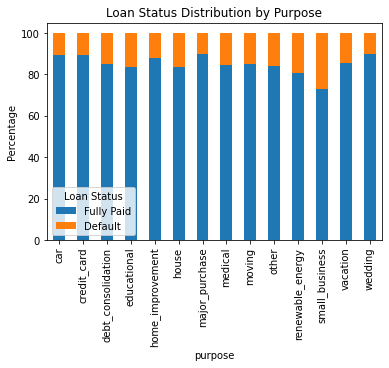

In [422]:
percentage_df = df_cleaned.groupby("purpose")["loan_status_numeric"].value_counts(normalize=True).unstack() * 100
plt.figure(figsize=(30, 10))
ax=percentage_df.plot(kind="bar", stacked=True)
custom_palette = ["orange", "green"]
sns.set_palette(custom_palette)
plt.title("Loan Status Distribution by Purpose")
plt.xlabel("purpose")
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.legend(title="Loan Status", labels=["Fully Paid", "Default"])
plt.show()

Conclusion: Small business has high defaulter rate followed by renewable energy and education

<Axes: xlabel='addr_state', ylabel='loan_status_numeric'>

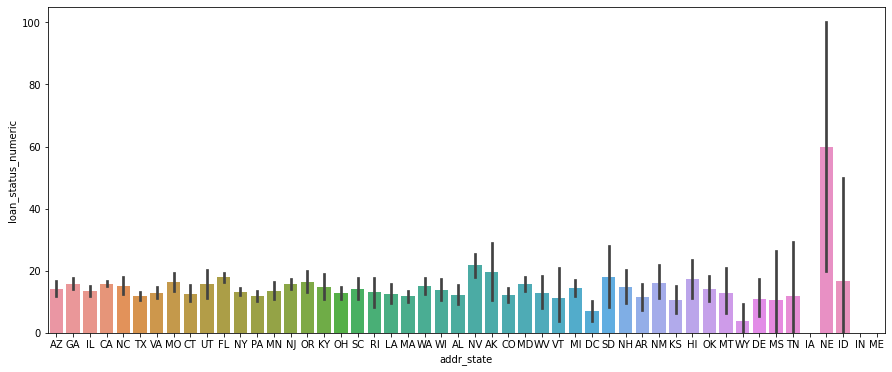

In [426]:
plt.figure(figsize=[15, 6])
sns.barplot(x='addr_state', y='loan_status_numeric', data=df_cleaned, estimator=lambda x: sum(x) / len(x) * 100)

<Figure size 2160x720 with 0 Axes>

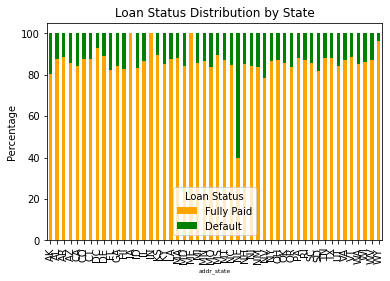

In [68]:
percentage_df = df_cleaned.groupby("addr_state")["loan_status_numeric"].value_counts(normalize=True).unstack() * 100
plt.figure(figsize=[30, 10])
ax=percentage_df.plot(kind="bar", stacked=True)
custom_palette = ["orange", "green"]
sns.set_palette(custom_palette)
plt.title("Loan Status Distribution by State")
plt.xlabel("addr_state", fontsize=6)
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.legend(title="Loan Status", labels=["Fully Paid", "Default"])
plt.show()

Conclusion: NE(Nebraska) state has higher defaulter rate

In [77]:
categorical_columns = df_cleaned.select_dtypes(include=["object"]).columns
print(categorical_columns)

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'zip_code'],
      dtype='object')


# 1.3 Bivariate analysis - continous

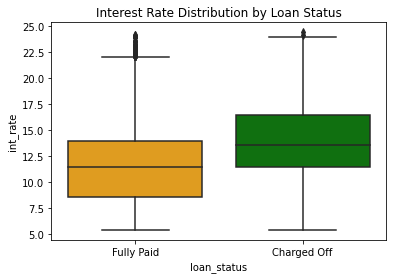

In [434]:
#Hypothesis: Higher interest rates might lead to a higher likelihood of default.
sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=df_cleaned)
plt.title("Interest Rate Distribution by Loan Status")
plt.show()

Conclusion: Majority of the Defaulter's has higher interest rate compared to fully paid customers.Upper 25% of defaulters has higher interest rate than fully paid customer's interest rate

<Axes: xlabel='loan_status_numeric', ylabel='annual_inc'>

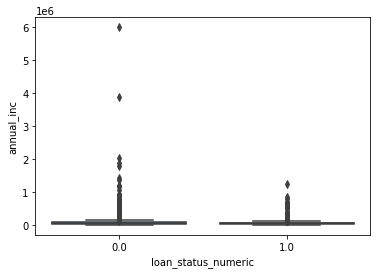

In [85]:
sns.boxplot(x = 'loan_status_numeric', y = 'annual_inc' ,data=df_cleaned)

In [87]:
df_cleaned['annual_inc'].head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
5    36000.0
Name: annual_inc, dtype: float64

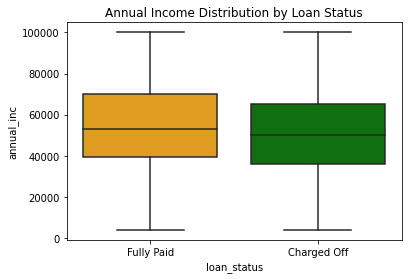

In [435]:
df_cleaned_inc_outlier = df_cleaned[df_cleaned['annual_inc'] < 100000]
#Analyze the relationship between loan status and salary
sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=df_cleaned_inc_outlier)
plt.title("Annual Income Distribution by Loan Status")
plt.show()

Conclusion:Higher annual income might slightly reduce the likelihood of default.


In [89]:
print(continuous_columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti',
       'pub_rec_bankruptcies', 'loan_status_numeric'],
      dtype='object')


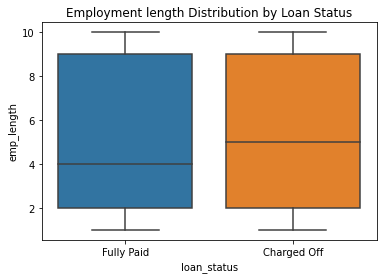

In [115]:
#Hypothesis:The length of employment could reflect stability and the ability to repay loans. Shorter employment lengths might be associated with higher default rates.
sns.boxplot(x = 'loan_status', y = 'emp_length' ,data=df_cleaned)
plt.title("Employment length Distribution by Loan Status")
plt.show()

Conclusion:  Median of Defaulter's employment length is higher than fully paid customers. 
For fully paid customers we have more values between 4 and 9 , where as defauters's employement length are kind of equally distributed. 

emp_length is not much influencing loan_status.

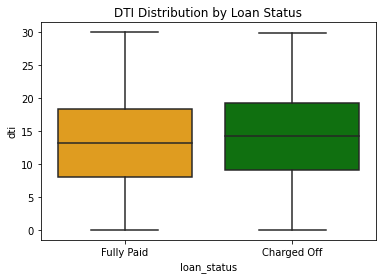

In [437]:
sns.boxplot(x = 'loan_status', y = 'dti' ,data=df_cleaned)
plt.title("DTI Distribution by Loan Status")
plt.show()

Conclusion:  Higher DTI ratios might have a small impact on default rates.

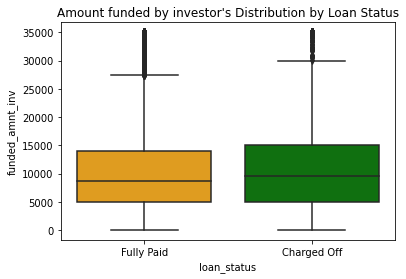

In [438]:
sns.boxplot(x = 'loan_status', y = 'funded_amnt_inv' ,data=df_cleaned)
plt.title("Amount funded by investor's Distribution by Loan Status")
plt.show()

Conclusion:The impact of funded_amnt_inv on default rates appears to be minimal. Defaulter’s upper amount range increased compared to fully paid customers.

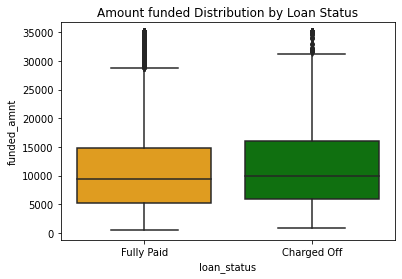

In [439]:
sns.boxplot(x = 'loan_status', y = 'funded_amnt' ,data=df_cleaned)
plt.title("Amount funded Distribution by Loan Status")
plt.show()

Conclusion: Like with loan_amnt, higher funded amounts might have a slight impact on default rates.
 Defaulter’s upper amount range increased compared to fully paid customers.

In [111]:
df_cleaned['installment'].max()

1305.19

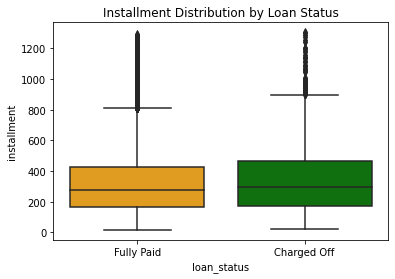

In [452]:
sns.boxplot(x = 'loan_status', y = 'installment' ,data=df_cleaned)
plt.title("Installment Distribution by Loan Status")
plt.show()

Conclusion: The impact of installment on default rates seems to be minimal.
1) Both IQR box size difference is relatively small, it indicates less difference in the variability (spread) of 'installment' amounts between the two loan statuses.
 2) Defaulter’s upper installment range increased compared to fully paid customers.


In [113]:
df_cleaned['installment'].describe()

count    37544.000000
mean       324.650164
std        208.901055
min         15.690000
25%        167.370000
50%        280.000000
75%        428.942500
max       1305.190000
Name: installment, dtype: float64

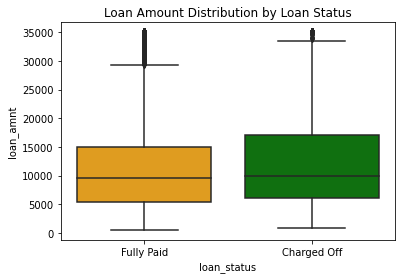

In [453]:
#Hypothesis: The amount of the loan could be a strong indicator. 
sns.boxplot(x = 'loan_status', y = 'loan_amnt' ,data=df_cleaned)
plt.title("Loan Amount Distribution by Loan Status")
plt.show()

Conclusion:
Higher loan amounts might slightly increase the chance of default, but the effect is minimal
Max people who fully paid loan has lesser loan amount range. Both IQR box sizes and upper range is different, it indicates a difference in the variability (spread) of loan amount. 

In [109]:
df_cleaned['year']=df_cleaned['year'].astype('category')

<Axes: xlabel='year', ylabel='loan_status_numeric'>

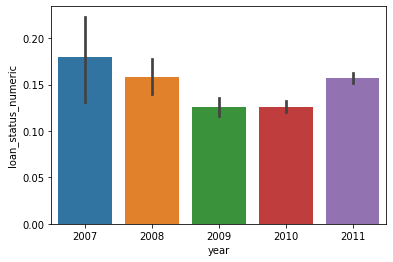

In [110]:
sns.barplot(y = 'loan_status_numeric', x = 'year' ,data=df_cleaned)

In [475]:
df_cleaned.groupby("year")["loan_status_numeric"].value_counts(normalize=True).unstack() * 100

loan_status_numeric,0,1
year,,
2007,82.071713,17.928287
2008,84.186940,15.813060
2009,87.404580,12.595420
2010,87.417514,12.582486
2011,84.334125,15.665875


<Figure size 2160x720 with 0 Axes>

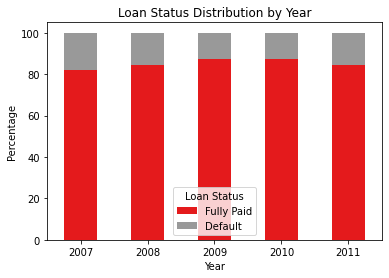

In [111]:
# lets compare the default rates across years
# the default rate had suddenly dipped in 2011

#sns.barplot(y = 'loan_status_numeric', x = 'year' ,data=df_cleaned)


percentage_df = df_cleaned.groupby("year")["loan_status_numeric"].value_counts(normalize=True).unstack() * 100
plt.figure(figsize=(30, 10))
percentage_df.plot(kind="bar", stacked=True, colormap="Set1")
plt.title("Loan Status Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Loan Status", labels=["Fully Paid", "Default"])

plt.show()

Conclusion:The defaulter rate had suddenly dipped in 2011 inspite of hike in 2009 & 2010

In [79]:
df_cleaned['loan_status_count']=df_cleaned.groupby(['year','loan_status'])['loan_status'].transform('count')


In [80]:
df_cleaned.pivot_table(values="loan_status_count", index="loan_status", columns="year")

year,2007,2008,2009,2010,2011
loan_status,,,,,
Charged Off,45,247,594,1411,3102
Fully Paid,206,1315,4122,9803,16699


In [88]:
df_cleaned_2011=df_cleaned[df_cleaned['year']==2011]
df_cleaned_2011['loan_status_numeric'].value_counts()

loan_status_numeric
0    16699
1     3102
Name: count, dtype: int64

In [83]:
pivot_table =df_cleaned.pivot_table(values="loan_status_count", index="loan_status", columns="year")

<Axes: xlabel='loan_status'>

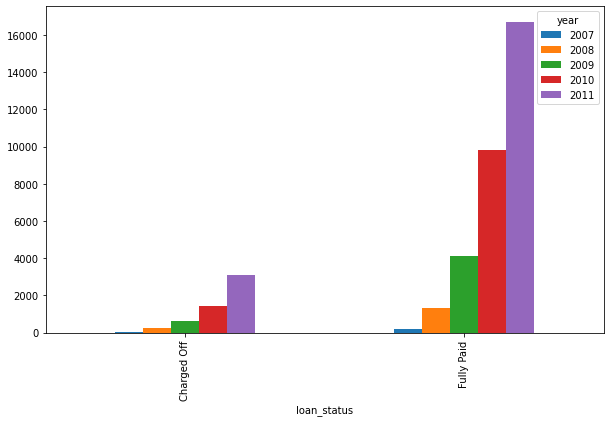

In [84]:
pivot_table.plot(kind="bar", figsize=(10, 6))

Conclusion: We can conclude that the  defaulters rate continuously increase every year

In [99]:
# comparing default rates across months
pivot_table =df_cleaned.pivot_table(values="loan_status_count", index="loan_status", columns="month")

<Axes: xlabel='loan_status'>

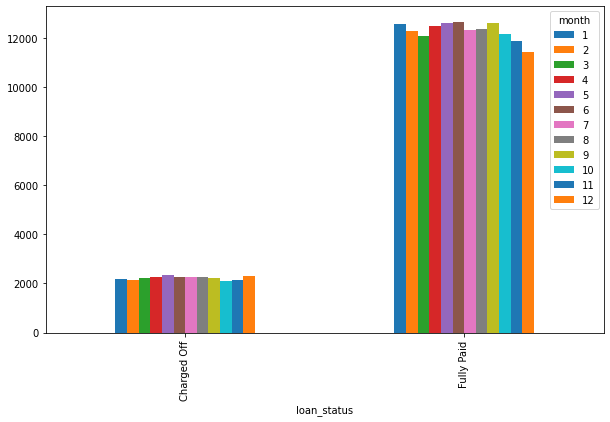

In [98]:
pivot_table.plot(kind="bar", figsize=(10, 6))

Conclusion: Defaulter rate is not much varying across months of the year

In [77]:
df_cleaned['loan_status_count'].sum()

1062450226

<Axes: >

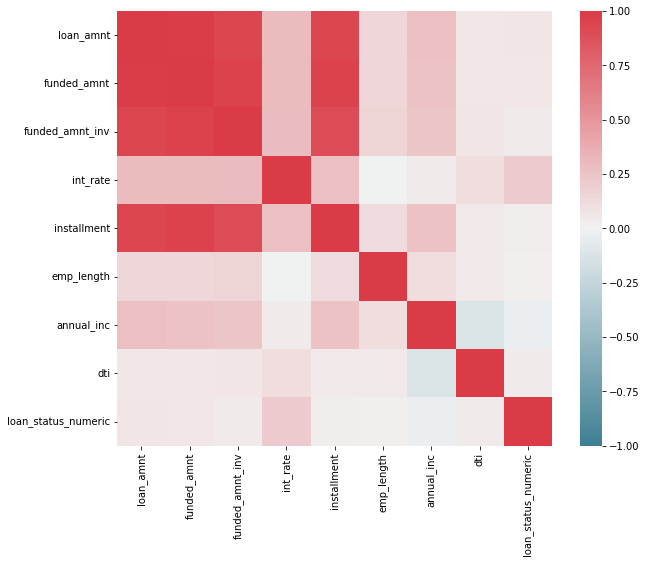

In [112]:
#correlation
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))
corr = df_cleaned[continuous_columns].corr()
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),vmin=-1.0, vmax=1.0,square=True, ax=ax)

In [113]:
df_cleaned[continuous_columns] = df_cleaned[continuous_columns].astype(float)

In [114]:
#correlation metrix for continuous variables
df_cleaned[continuous_columns].corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,loan_status_numeric
loan_amnt,1.000000,0.981603,0.936871,0.299237,0.931686,0.148267,0.266282,0.061402,0.062680
funded_amnt,0.981603,1.000000,0.955300,0.302955,0.957721,0.147930,0.261959,0.061251,0.059535
funded_amnt_inv,0.936871,0.955300,1.000000,0.295697,0.904110,0.158852,0.249320,0.070007,0.040097
int_rate,0.299237,0.302955,0.295697,1.000000,0.274791,-0.000602,0.046092,0.112188,0.213497
installment,0.931686,0.957721,0.904110,0.274791,1.000000,0.121101,0.264684,0.050727,0.029868
emp_length,0.148267,0.147930,0.158852,-0.000602,0.121101,1.000000,0.111107,0.048619,0.016656
annual_inc,0.266282,0.261959,0.249320,0.046092,0.264684,0.111107,1.000000,-0.123582,-0.038501
dti,0.061402,0.061251,0.070007,0.112188,0.050727,0.048619,-0.123582,1.000000,0.042803
loan_status_numeric,0.062680,0.059535,0.040097,0.213497,0.029868,0.016656,-0.038501,0.042803,1.000000


loan_amnt: A correlation of 0.06268 suggests a very weak positive linear relationship between the loan amount and the likelihood of loan default. This could imply that higher loan amounts might slightly increase the chance of default, but the effect is minimal.

funded_amnt: A correlation of 0.059535 indicates a similarly very weak positive linear relationship between the funded loan amount and loan default. Like with loan_amnt, higher funded amounts might have a slight impact on default rates.

funded_amnt_inv: A correlation of 0.040097 suggests a very weak positive linear relationship between the funded loan amount by investors and loan default. The impact of funded_amnt_inv on default rates appears to be minimal.

term: A correlation of 0.1752 indicates a moderate positive linear relationship between the loan term and loan default. Longer loan terms might be associated with a higher likelihood of default.

int_rate: A correlation of 0.213497 suggests a moderate positive linear relationship between the interest rate and loan default. Higher interest rates might be associated with a higher chance of default.

installment: A correlation of 0.029868 indicates a very weak positive linear relationship between the installment amount and loan default. The impact of installment on default rates seems to be minimal.

emp_length: A correlation of 0.016656 suggests a very weak positive linear relationship between employment length and loan default. There seems to be a minimal impact of employment length on default rates.

annual_inc: A correlation of -0.038501 suggests a very weak negative linear relationship between annual income and loan default. However, this negative correlation is also weak, implying that higher annual income might slightly reduce the likelihood of default.

dti: A correlation of 0.042803 indicates a very weak positive linear relationship between debt-to-income ratio (DTI) and loan default. Higher DTI ratios might have a small impact on default rates.

pub_rec_bankruptcies: A correlation of 0.045625 suggests a very weak positive linear relationship between the number of public record bankruptcies and loan default. A higher number of public record bankruptcies might have a minor impact on default rates.

# 3.3 Segmented Analysis

# 3.3.1.Continuous variables

Let's now analyse how the default rate varies across continuous variables.

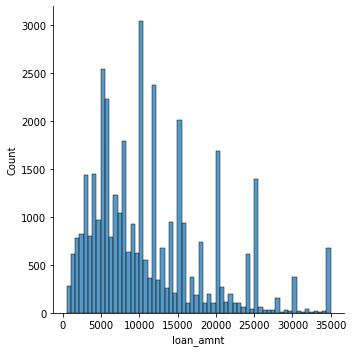

In [35]:
sns.displot(df_cleaned['loan_amnt'])

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.

In [36]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df_cleaned['loan_amnt'] = df_cleaned['loan_amnt'].apply(lambda x: loan_amount(x))


In [37]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status_numeric', data=df_cleaned)
    plt.show()

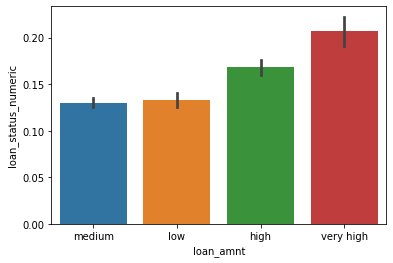

In [40]:
# let's compare the default rates across loan amount type
# higher the loan amount, higher the default rate
plot_cat('loan_amnt')

In [42]:
df_cleaned.groupby(['loan_status','loan_amnt']).size()

loan_status  loan_amnt
Charged Off  high          1274
             low            945
             medium        2617
             very high      563
Fully Paid   high          6298
             low           6150
             medium       17540
             very high     2157
dtype: int64

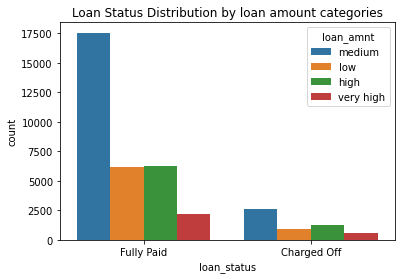

In [43]:
sns.countplot(data=df_cleaned, x="loan_status", hue="loan_amnt")
plt.title("Loan Status Distribution by loan amount categories")
plt.show()

Conclusion:Most frequency of defaulting has been identified for loan amount category 'Medium'.

In [29]:
# funded amount  in bins
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df_cleaned['funded_amnt'] = df_cleaned['funded_amnt'].apply(lambda x: funded_amount(x))

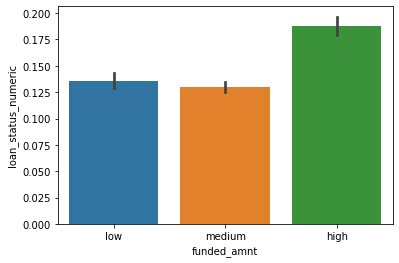

In [30]:
# higher the funded amount, higher the default rate
plot_cat('funded_amnt')

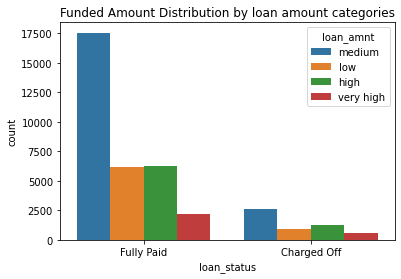

In [45]:
sns.countplot(data=df_cleaned, x="loan_status", hue="loan_amnt")
plt.title("Funded Amount Distribution by loan amount categories")
plt.show()

Highest frequency of defaulting has been identified for category 'Medium'(Range: 5000 - 15000)

In [46]:
# lets also convert interest rate to low, medium, high

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df_cleaned['int_rate'] = df_cleaned['int_rate'].apply(lambda x: int_rate(x))

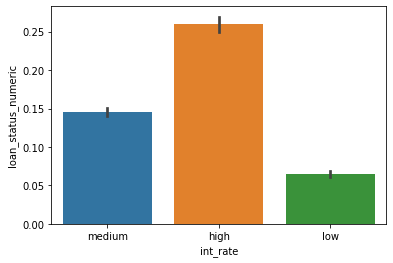

In [32]:
# comparing default rates across rates of interest
# high interest rates default more, as expected
plot_cat('int_rate')

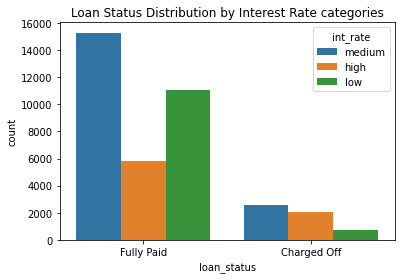

In [47]:
sns.countplot(data=df_cleaned, x="loan_status", hue="int_rate")
plt.title("Loan Status Distribution by Interest Rate categories")
plt.show()


Highest frequency of defaulting has been identified for category 'Medium'(Range: 10-15)

In [48]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df_cleaned['dti'] = df_cleaned['dti'].apply(lambda x: dti(x))

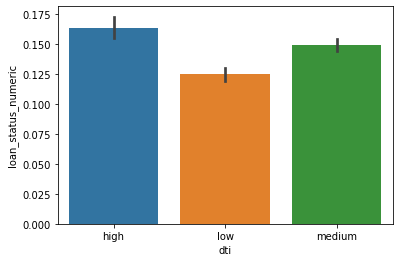

In [49]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
plot_cat('dti')

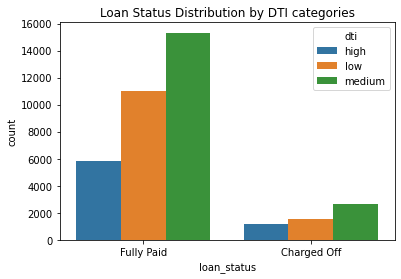

In [50]:
sns.countplot(data=df_cleaned, x="loan_status", hue="dti")
plt.title("Loan Status Distribution by DTI categories")
plt.show()

Highest frequency of defaulting has been identified for category 'Medium'(Range: 10-20)

In [51]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df_cleaned['installment'] = df_cleaned['installment'].apply(lambda x: installment(x))

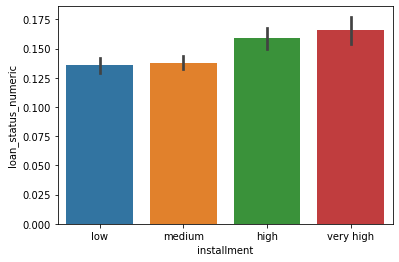

In [52]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plot_cat('installment')

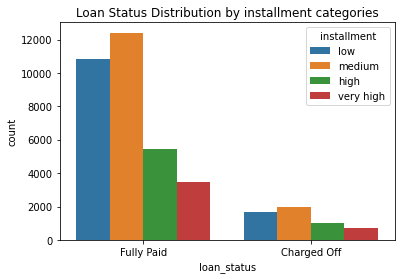

In [53]:
sns.countplot(data=df_cleaned, x="loan_status", hue="installment")
plt.title("Loan Status Distribution by installment categories")
plt.show()

Highest frequency of defaulting has been identified for category 'Medium'(Range: 200-400)

In [54]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df_cleaned['annual_inc'] = df_cleaned['annual_inc'].apply(lambda x: annual_income(x))

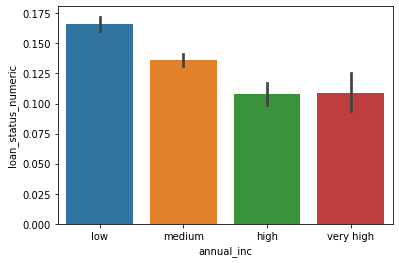

In [57]:
# annual income and default rate
# lower the annual income, higher the default rate
plot_cat('annual_inc')

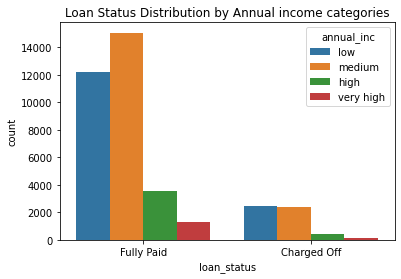

In [56]:
sns.countplot(data=df_cleaned, x="loan_status", hue="annual_inc")
plt.title("Loan Status Distribution by Annual income categories")
plt.show()

Highest frequency of defaulting has been identified for category ‘low '(Range: <= 50000) and 'Medium'(Range: 50000 -100000)

In [59]:
# employment length
# first, let's drop the missing value observations in emp length
df_cleaned = df_cleaned[~df_cleaned['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df_cleaned['emp_length'] = df_cleaned['emp_length'].apply(lambda x: emp_length(x))

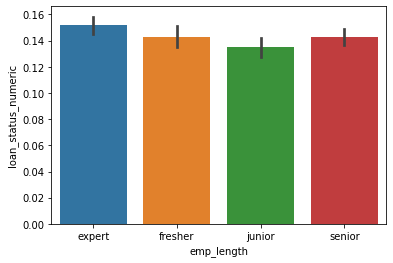

In [60]:
# emp_length and default rate
# not much of a predictor of default
plot_cat('emp_length')

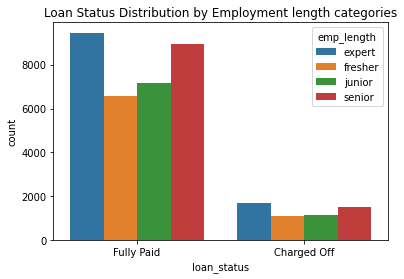

In [61]:
sns.countplot(data=df_cleaned, x="loan_status", hue="emp_length")
plt.title("Loan Status Distribution by Employment length categories")
plt.show()

Highest frequency of defaulting has been identified for expert category(>7 years of expr ) followed by seniors(3-7 years of expr )

# 3.3.2.Categorical variables

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.

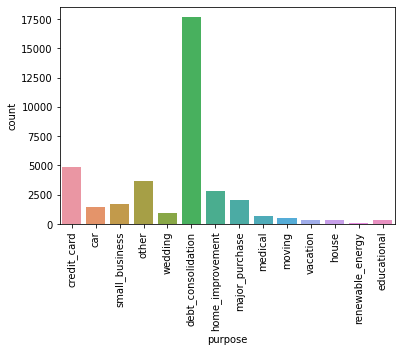

In [81]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
#plt.figure(figsize=(7, 5))
sns.countplot(x='purpose', data=df_cleaned)
plt.xticks(rotation=90)
plt.show()

In [74]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df_purpose_segment = df_cleaned[df_cleaned['purpose'].isin(main_purposes)]
df_purpose_segment['purpose'].value_counts()

purpose
debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: count, dtype: int64

In [63]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status_numeric', hue='purpose', data=df_purpose_segment)
    plt.show()

In [361]:
df_purpose_segment.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,loan_status_numeric
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,0
6,7000,7000,7000.0,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0.0,0
10,6500,6500,6500.0,60,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,AZ,16.12,0.0,0
11,12000,12000,12000.0,36,12.69,402.54,B,B5,10,OWN,75000.0,Source Verified,Dec-11,Fully Paid,debt_consolidation,CA,10.78,0.0,0
12,9000,9000,9000.0,36,13.49,305.38,C,C1,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,debt_consolidation,VA,10.08,0.0,1


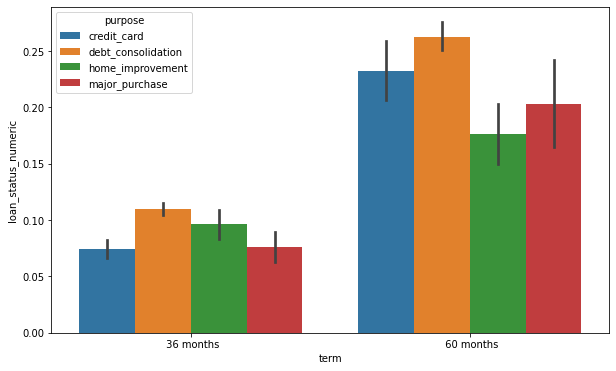

In [64]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plot_segmented('term')


Higher the Term higher the defaulting rate. Majority of defaulting falls under debt_consolidation category

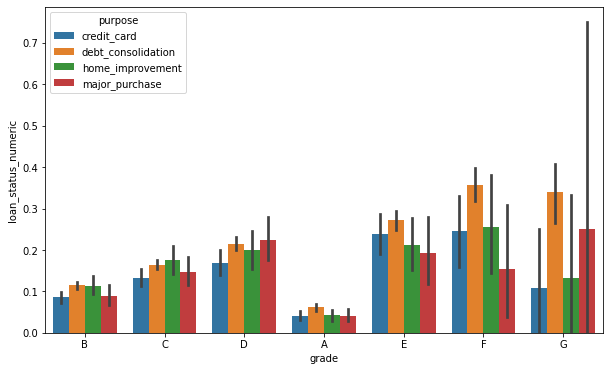

In [66]:
# grade of loan
plot_segmented('grade')

Highest defaulting falls under debt_consolidation category other than B and C

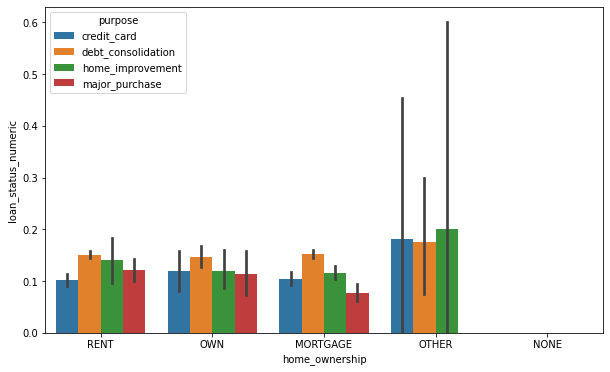

In [67]:
# home ownership
plot_segmented('home_ownership')

In general, debt consolidation loans have the highest default rates. Lets compare across other categories as well

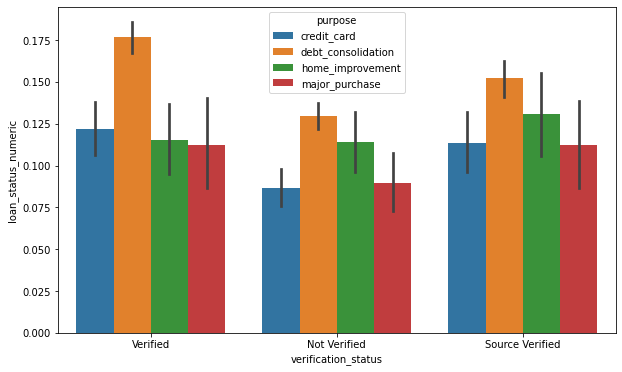

In [68]:
# verification_status comparison
plot_segmented('verification_status')

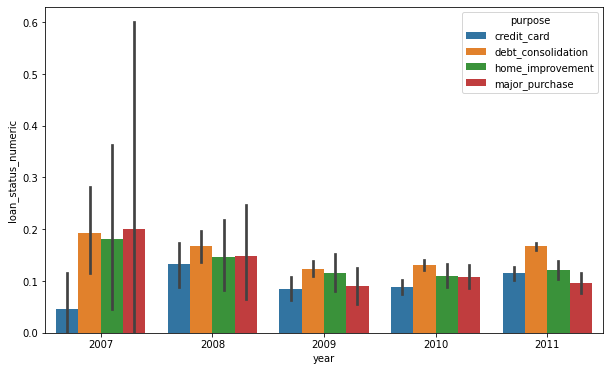

In [75]:
# year
plot_segmented('year')

As we move from 2007 to 2011, debt consolidation loans have the highest default rates. 
